In [18]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

number_of_nodes = 50
p_graph = 0.2
deg = 10
number_of_simulations = 1000

def simulation(network):
    p = 0
    my_list = []
    my_reduced_list = []

    while p < 1:
        is_reduced = 0
        for j in nx.edges(network):
            if random.random() < p:
                network.remove_edge(j[0], j[1])

        matrix = nx.adjacency_matrix(network).todense()
        if np.allclose(matrix, np.tril(matrix)) \
                or np.allclose(matrix, np.triu(matrix)) \
                or np.allclose(matrix, np.diag(matrix)):
            is_reduced += 1

        my_reduced_list.append(is_reduced)
        my_list.append(p)
        p += 0.01

    return [my_list, my_reduced_list]


def plot(p_list, is_reduced_list_p, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(p_list, is_reduced_list_p)
    plt.title(title)
    plt.ylabel('irreducibility')
    plt.xlabel('Probability')
    ax.grid()
    plt.savefig('./phase1/1/' + title + '.png')
    plt.show()


def erdos_renyi_test(number_of_node, probability_of_edge, number_of_simulation):
    erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
    [p_list, is_reduced_list_sum] = simulation(erdos_network)
    for i in range(1, number_of_simulation):
        erdos_network = nx.erdos_renyi_graph(number_of_node, probability_of_edge)
        [p_list, is_reduced_list] = simulation(erdos_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)
    plot(p_list, 1 - (is_reduced_list_sum / number_of_simulation), 'Erdos_Renyi')


def watts_strogatz_test(number_of_node, number_of_edge, probability_of_edge, number_of_simulation):
    watts_network = nx.watts_strogatz_graph(number_of_node, number_of_edge, probability_of_edge)
    [p_list, is_reduced_list_sum] = simulation(watts_network)
    for i in range(1, number_of_simulation):
        watts_network = nx.watts_strogatz_graph(number_of_node, number_of_edge, probability_of_edge)
        [p_list, is_reduced_list] = simulation(watts_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)
    plot(p_list, 1 - (is_reduced_list_sum / number_of_simulation), 'Watts-Strogatz')


def barabasi_albert_test(number_of_node, number_of_edge, number_of_simulation):
    barabasi_network = nx.barabasi_albert_graph(number_of_node, number_of_edge)
    [p_list, is_reduced_list_sum] = simulation(barabasi_network)

    for i in range(1, number_of_simulation):
        barabasi_network = nx.barabasi_albert_graph(number_of_node, number_of_edge)
        [p_list, is_reduced_list] = simulation(barabasi_network)
        is_reduced_list_sum = np.add(is_reduced_list, is_reduced_list_sum)

    plot(p_list,(is_reduced_list_sum / number_of_simulation), 'Barabasi-Albert')






C:\Users\samir\AppData\Local\Temp\ipykernel_4720\138225768.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(network).todense()
C:\Users\samir\AppData\Local\Temp\ipykernel_4720\138225768.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(network).todense()


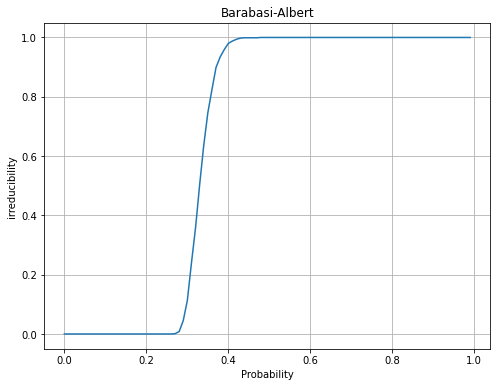

In [3]:
barabasi_albert_test(number_of_nodes, deg, number_of_simulations)

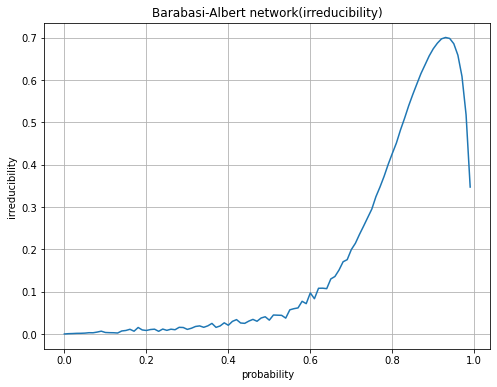

In [15]:
[e_list, eq3_list] = calculation_eq3(100)
plot_irreducibility(e_list, eq3_list, 'Barabasi-Albert')

In [19]:

[e_list, eq6_list] = calculation_eq6(1)
plot_reliability(e_list, eq6_list, 'Barabasi-Albert')

eq6  0


KeyboardInterrupt: 